<a href="https://colab.research.google.com/github/MHD-Hamza-Ammar/MHD-Hamza-Ammar/blob/main/A1_KNN_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import cv2 
import os
from imutils import paths

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def imgmodifier(img, size=(32,32)):
    img=cv2.resize(img,size)
    pic=img.flatten()
    return pic

path=list(paths.list_images("/content/drive/MyDrive/AI Course - Raheem/Datasets/Faces Samples"))
img=[]
label=[]

for (i,imagp) in enumerate(path):
    imge=cv2.imread(imagp)
    lab=imagp.split(os.path.sep)[-2]
    pixel=imgmodifier(imge)
    img.append(pixel)
    label.append(lab)
print(label)

['Abdullah', 'Abdullah', 'Abdullah', 'Abdullah', 'Aaron_Peirsol', 'Aaron_Peirsol', 'Aaron_Peirsol', 'Aaron_Peirsol', 'Hamza', 'Hamza', 'Hamza', 'Hamza', 'Hamza', 'Abel_Pacheco', 'Abel_Pacheco', 'Abel_Pacheco', 'Abel_Pacheco', 'Abdoulaye_Wade', 'Abdoulaye_Wade', 'Abdoulaye_Wade', 'Abdoulaye_Wade']


In [5]:
x=np.array(img)
y=np.array(label)

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [28]:
model=KNeighborsClassifier(n_neighbors=2)

In [29]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

In [30]:
pred=model.predict(xtest)

In [34]:
pred

array(['Aaron_Peirsol', 'Abdoulaye_Wade', 'Aaron_Peirsol', 'Abdullah',
       'Hamza'], dtype='<U14')

In [35]:
ytest

array(['Aaron_Peirsol', 'Abdoulaye_Wade', 'Abdullah', 'Abel_Pacheco',
       'Hamza'], dtype='<U14')

In [31]:
model.score(xtest,ytest)

0.6

In [32]:
from sklearn.metrics import confusion_matrix

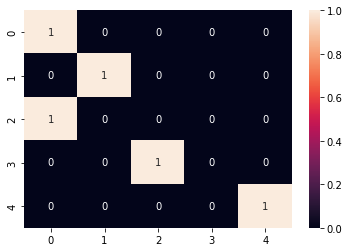

In [33]:
gp=confusion_matrix(ytest,pred)

sb.heatmap(gp,annot=True,robust=True,)